In [5]:
#import packages
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#import googleplaystore.csv filre
df = pd.read_csv('/users/mona/Desktop/googleplaystore.csv')

#Replace "nan" to "0" in rating
#df1["Rating"] = df1["Rating"].fillna(0)

#drop columns with "nan" value
df1=df.dropna(subset=['Rating'])


#import reviews.csv file
df2 = pd.read_csv('/users/mona/Desktop/reviews.csv')
df2=df2.dropna(subset=['Translated_Review'])

#import 4 ranking ABCD file: 1=A 3=B 0=C 2=D
df3 = pd.read_csv('/users/mona/Desktop/rankclass.csv')

df4=df1.set_index('App').join(df3.set_index('App'))


#Create dataframe 5 that only contains entertainment category

df5=df4[df4.Category.str.contains("GAME")==True]
df5.duplicated()
df5=df5.drop_duplicates()


df6 = df5.join(df2.set_index('App'))

#reset the index
df7=df6.reset_index()
df7=df7.dropna()
df7

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ranking,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762
1,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,"The game interesting challenging. However, oft...",Positive,0.200000,0.633333
2,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,"Wow ,i play 15 puzzle 1st round I remember puz...",Positive,0.133333,0.716667
3,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,Love game deleting I've waiting 3 months level...,Positive,0.059091,0.363636
4,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,Way many aggressive ads,Positive,0.500000,0.500000
5,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,amaze i'm addicted,Negative,-0.400000,0.600000
6,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,I like game,Negative,-0.400000,0.400000
7,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,I play game,Negative,-0.400000,0.400000
8,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,It's toooo gud game,Negative,-0.400000,0.400000
9,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0,"Too many unskippable ads. Other than, great game.",Positive,0.193750,0.506250


In [7]:
positive=pd.read_csv('/users/mona/Desktop/gamepositivewords.txt', header=None)
print(positive)

                0
0             fun
1       knowledge
2            nice
3            love
4       recommend
5   concentration
6       fantastic
7           power
8     unskippable
9         support
10       accurate
11            win
12      beautiful
13          liked
14      childhood


In [8]:
negative=pd.read_csv('/users/mona/Desktop/gamenegativewords.txt', header=None)
print(negative)

              0
0         stuck
1     confusing
2      terrible
3    unpleasant
4         avoid
5         waist
6           bad
7          hate
8      opponent
9          pool
10       boring
11        tough
12    brainless
13     deleting
14  frustrating
15        crush


In [9]:
def pre_process(text):
    
    #lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\W)+"," ",text)
    
    return text

In [10]:
for row in negative.iterrows():
    keyword=row[1].to_string().replace("0    ","");
    df7[keyword]= df7.Translated_Review.str.split(keyword).str.len()-1

In [11]:
for row in positive.iterrows():
    keyword=row[1].to_string().replace("0    ","");
    df7[keyword]= df7.Translated_Review.str.split(keyword).str.len()-1

df7

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,concentration,fantastic,power,unskippable,support,accurate,win,beautiful,liked,childhood
0,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
1,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
2,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,1
3,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
4,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
5,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
6,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
7,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
8,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,0,0,0,0,0,0,0
9,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,...,0,0,0,1,0,0,0,0,0,0


In [36]:
df8=df7.groupby(['App','Ranking','Rating']).sum()
#df8.to_csv('ReviewData.csv')
df8 = df8.reset_index();
#df8=df8.drop(['App'],1)
data=df8.drop(['App','Sentiment_Polarity','Sentiment_Subjectivity'],1)
data

,Ranking,Rating,stuck,confusing,terrible,unpleasant,avoid,waist,bad,hate,...,concentration,fantastic,power,unskippable,support,accurate,win,beautiful,liked,childhood
0,0,4.6,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,1,3.8,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0
2,0,4.5,12,0,0,0,0,0,84,30,...,0,0,90,0,36,6,372,0,24,0
3,3,4.2,0,0,4,0,0,0,20,18,...,0,0,0,0,2,0,4,0,0,0
4,0,4.6,4,0,0,0,8,0,16,2,...,0,8,12,0,4,0,14,54,8,0
5,0,4.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,4.6,0,0,0,0,0,0,2,1,...,0,0,2,0,0,0,5,0,0,0
7,3,4.4,5,0,50,0,15,0,10,170,...,0,5,275,20,15,0,120,0,0,25
8,3,4.4,0,0,0,0,0,0,8,4,...,0,0,8,0,0,0,4,0,0,0
9,0,4.5,0,0,0,0,0,0,2,1,...,0,0,1,0,0,0,1,0,0,0


In [37]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

In [42]:
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data,4)
df9=kmeans = pd.DataFrame(clust_labels)
df9
#data.insert((data.shape[1]),'kmeans',kmeans)

,0
0,0
1,0
2,3
3,0
4,0
5,0
6,0
7,2
8,0
9,0


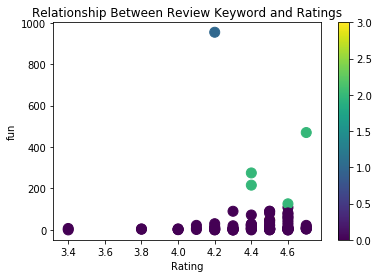

In [44]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Rating'],data['fun'],
                     c=kmeans[0],s=100)
ax.set_title('Relationship Between Review Keyword and Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('fun')
plt.colorbar(scatter)

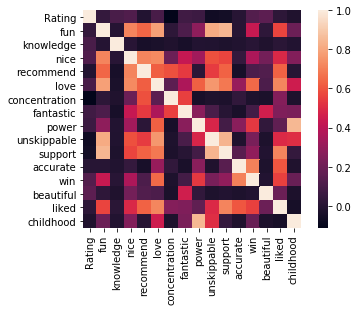

In [40]:
#correlation analysis: rating and positive key word
df9 = df8[['Rating','fun','knowledge','nice', 'recommend','love',
          'concentration','fantastic','power','unskippable','support','accurate','win','beautiful','liked','childhood']] #Subsetting the data
cor = df9.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)

In [41]:
#correlation analysis: rating and negative key word
df9 = df8[['Rating','disappointed','ads','commercial', 'complaints', 
          'bugs','interrupt','log','account','commercials','shuts','load','spend','time','waiting','notch']] #Subsetting the data
cor = df9.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)

KeyError: "['disappointed' 'ads' 'commercial' 'complaints' 'bugs' 'interrupt' 'log'\n 'account' 'commercials' 'shuts' 'load' 'spend' 'time' 'waiting' 'notch'] not in index"